# Model Portfolio Optimisation & Benchmark Comparison

This notebook constructs and analyses a diversified Indian equity portfolio, optimises it using Markowitz and Risk Parity methods, and compares its performance to Nifty 50 and Nifty Midcap 150 indices.

## Import Required Libraries

We use yfinance for data, pandas and numpy for analysis, matplotlib for plotting, and scipy for optimisation.

In [81]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.optimize import minimize

## Define Portfolio Tickers

List of selected stocks across sectors for portfolio construction.

In [ ]:
tickers = [
    # BFSI
    "HDFCBANK.NS",      # HDFC Bank
    "SBIN.NS",          # State Bank of India
    "AXISBANK.NS",      # Axis Bank
    "ICICIGI.NS",  # ICICI Lombard General Insurance
    "SHRIRAMFIN.NS",    # Shriram Finance

    # Consumers
    "ITC.NS",           # ITC
    "TATACONSUM.NS",    # Tata Consumer Products
    "VMART.NS",         # V-Mart
    "CROMPTON.NS",      # Crompton Consumer

    # Auto
    "M&M.NS",           # Mahindra & Mahindra
    "MARUTI.NS",        # Maruti Suzuki

    # IT
    "HCLTECH.NS",       # HCL Technologies
    "TCS.NS",           # Tata Consultancy Services

    # Healthcare
    "APOLLOHOSP.NS",    # Apollo Hospitals Enterprise
    "SYNGENE.NS",       # Syngene International
    "AUROPHARMA.NS",    # Aurobindo Pharma

    # Leisure
    "INDHOTEL.NS",          # Indian Hotels Company (Taj Hotels)
    "LEMONTREE.NS",     # Lemon Tree Hotels
    "INDIGO.NS",        # InterGlobe Aviation (IndiGo)

    # Energy
    "RELIANCE.NS",      # Reliance Industries

    # Materials
    "ULTRACEMCO.NS",    # UltraTech Cement

    # Industrials
    "ABB.NS",           # ABB India
    "TIINDIA.NS",    # Tube Investments of India
    "POLYCAB.NS"        # Polycab India
]


'\n\ntickers = [\n    # BFSI\n    "HDFCBANK.NS",      # HDFC Bank\n    "SBIN.NS",          # State Bank of India\n    "AXISBANK.NS",      # Axis Bank\n    "ICICIGI.NS",  # ICICI Lombard General Insurance\n    "SHRIRAMFIN.NS",    # Shriram Finance\n\n    # Consumers\n    "ITC.NS",           # ITC\n    "TATACONSUM.NS",    # Tata Consumer Products\n    "VMART.NS",         # V-Mart\n    "CROMPTON.NS",      # Crompton Consumer\n\n    # IT\n    "HCLTECH.NS",       # HCL Technologies\n    "TCS.NS",           # Tata Consultancy Services\n\n    # Healthcare\n    "APOLLOHOSP.NS",    # Apollo Hospitals Enterprise\n    "SYNGENE.NS",       # Syngene International\n    "AUROPHARMA.NS",    # Aurobindo Pharma\n\n    # Leisure\n    "INDHOTEL.NS",          # Indian Hotels Company (Taj Hotels)\n    "LEMONTREE.NS",     # Lemon Tree Hotels\n    \n\n    # Energy\n    "RELIANCE.NS",      # Reliance Industries\n\n    # Materials\n    "ULTRACEMCO.NS",    # UltraTech Cement\n\n    # Industrials\n    "ABB.NS",  

## Assign Portfolio Weights

Initial weights for each stock in the portfolio, reflecting sector allocation and diversification.

In [ ]:
weights = [
    0.07, 0.06, 0.04, 0.04, 0.04,  # BFSI: HDFCBANK, SBIN, AXISBANK, ICICILOMBARD, SHRIRAMFIN
    0.05, 0.05, 0.04, 0.04,        # Consumers: ITC, TATACONSUM, VMART, CROMPTON
    0.04, 0.04,                    # Auto: M&M, MARUTI
    0.03, 0.03,                    # IT: HCLTECH, TCS
    0.04, 0.04, 0.04,              # Healthcare: APOLLOHOSP, SYNGENE, AUROPHARMA
    0.04, 0.04, 0.04,              # Leisure: IHCL, LEMONTREE, INDIGO
    0.06,                          # Energy: RELIANCE
    0.04,                          # Materials: ULTRACEMCO
    0.03, 0.03, 0.03               # Industrials: ABB, TUBEINVEST, POLYCAB
]
weights = [round(w / 0.85, 5) for w in weights]
print(weights)
print(sum(weights))

[0.08235, 0.07059, 0.04706, 0.04706, 0.04706, 0.05882, 0.05882, 0.04706, 0.04706, 0.04706, 0.04706, 0.03529, 0.03529, 0.04706, 0.04706, 0.04706, 0.04706, 0.04706, 0.04706, 0.07059, 0.04706, 0.03529, 0.03529, 0.03529]
1.1764600000000003


## Download Historical Price Data

Fetch daily closing prices for all portfolio stocks for the selected period using yfinance.

In [84]:
#download historical data for given period of each stock
start_date= input("Enter the start date")#'2020-01-01'
end_date= input("Enter the end date")#'2024-12-31'
data= yf.download(tickers, start=start_date, end=end_date)['Close'].dropna()

/var/folders/zb/ht4y7_4j4_96z30rdgrpv_dm0000gn/T/ipykernel_67268/2258705853.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data= yf.download(tickers, start=start_date, end=end_date)['Close'].dropna()
[*********************100%***********************]  24 of 24 completed



## Calculate Portfolio Returns

Compute daily returns, overall cumulative return, and CAGR for the portfolio using the downloaded price data and assigned weights.

In [85]:
# Calculate daily returns for each stock
daily_returns = data.pct_change().dropna()

# Calculate portfolio returns using the weights
portfolio_returns = daily_returns.dot(weights)

# Calculate cumulative return of the portfolio over the time period
cumulative_return = (portfolio_returns + 1).prod() - 1
print(f"Overall portfolio return from {start_date} to {end_date}: {cumulative_return:.2%}")
# Extract year from start_date and end_date strings
start_year = int(start_date[:4])
end_year = int(end_date[:4])

print(f"CAGR of the portfolio: {((1 + cumulative_return) ** (1 / (end_year - start_year)) - 1):.2%}")

Overall portfolio return from 2020-01-01 to 2025-08-15: 330.80%
CAGR of the portfolio: 33.92%


Markowitz (Max Sharpe) Weights:
  HDFCBANK.NS: 0.0565
  SBIN.NS: 0.1615
  AXISBANK.NS: 0.0200
  ICICIGI.NS: 0.0200
  SHRIRAMFIN.NS: 0.0200
  ITC.NS: 0.0382
  TATACONSUM.NS: 0.0200
  VMART.NS: 0.0200
  CROMPTON.NS: 0.0200
  M&M.NS: 0.0560
  MARUTI.NS: 0.0200
  HCLTECH.NS: 0.0200
  TCS.NS: 0.0994
  APOLLOHOSP.NS: 0.0200
  SYNGENE.NS: 0.1204
  AUROPHARMA.NS: 0.0200
  INDHOTEL.NS: 0.0200
  LEMONTREE.NS: 0.0200
  INDIGO.NS: 0.0200
  RELIANCE.NS: 0.0200
  ULTRACEMCO.NS: 0.0200
  ABB.NS: 0.1279
  TIINDIA.NS: 0.0200
  POLYCAB.NS: 0.0200
Sharpe: 1.63, MDD: -40.17%, CAGR: 38.79%, Vol: 19.33%

Risk Parity Weights:
  HDFCBANK.NS: 0.0417
  SBIN.NS: 0.0417
  AXISBANK.NS: 0.0417
  ICICIGI.NS: 0.0417
  SHRIRAMFIN.NS: 0.0417
  ITC.NS: 0.0417
  TATACONSUM.NS: 0.0417
  VMART.NS: 0.0417
  CROMPTON.NS: 0.0417
  M&M.NS: 0.0417
  MARUTI.NS: 0.0417
  HCLTECH.NS: 0.0417
  TCS.NS: 0.0417
  APOLLOHOSP.NS: 0.0417
  SYNGENE.NS: 0.0417
  AUROPHARMA.NS: 0.0417
  INDHOTEL.NS: 0.0417
  LEMONTREE.NS: 0.0417
  INDIGO.NS

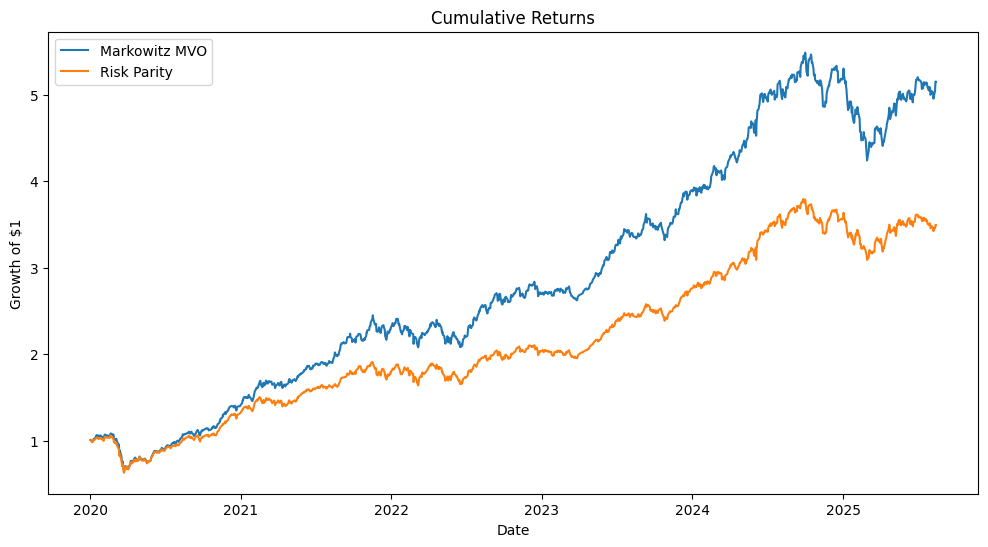

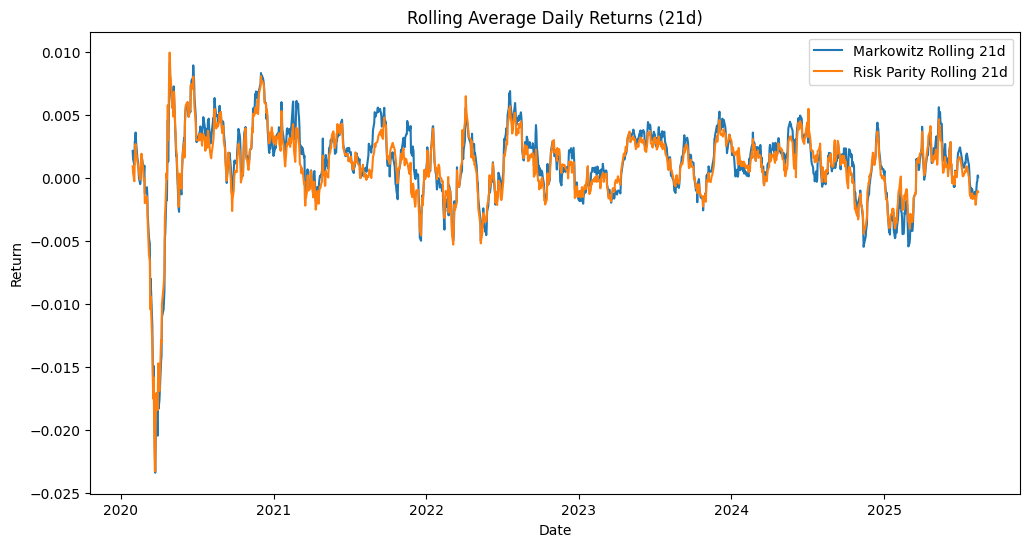

In [86]:
# STEP 1 — Basic statistics
mean_returns = daily_returns.mean()           # daily mean returns
cov_matrix = daily_returns.cov()              # daily covariance matrix
n_assets = len(tickers)

# Constraints & bounds
bounds = [(0.02, 1.0)] * n_assets  # min 2%, max 100% each
constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
init_guess = np.repeat(1/n_assets, n_assets)

# -----------------------
# STEP 2 — Markowitz (Max Sharpe)
def neg_sharpe(weights, mean_returns, cov_matrix, risk_free=0):
    port_return = np.dot(weights, mean_returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(port_return - risk_free/252) / port_vol

res_mvo = minimize(
    neg_sharpe, init_guess,
    args=(mean_returns, cov_matrix),
    method='SLSQP', bounds=bounds, constraints=constraints
)
markowitz_weights = res_mvo.x

# -----------------------
# STEP 3 — Risk Parity
def risk_contribution(weights, cov_matrix):
    marginal_contrib = np.dot(cov_matrix, weights)
    return weights * marginal_contrib

def risk_parity_objective(weights, cov_matrix):
    RC = risk_contribution(weights, cov_matrix)
    port_var = np.dot(weights, np.dot(cov_matrix, weights))
    target_RC = port_var / n_assets
    return np.sum((RC - target_RC)**2)

res_rp = minimize(
    risk_parity_objective, init_guess,
    args=(cov_matrix,),
    method='SLSQP', bounds=bounds, constraints=constraints
)
risk_parity_weights = res_rp.x

# -----------------------
# STEP 4 — Portfolio returns
def portfolio_metrics(weights, daily_returns, start_year, end_year, risk_free=0):
    port_returns = daily_returns.dot(weights)
    cum_returns = (1 + port_returns).cumprod()

    sharpe = ((port_returns.mean() - risk_free/252) / port_returns.std()) * np.sqrt(252)
    mdd = (cum_returns / cum_returns.cummax() - 1).min()
    total_return = cum_returns.iloc[-1] - 1
    years = end_year - start_year
    cagr = (cum_returns.iloc[-1]) ** (1 / years) - 1
    vol = port_returns.std() * np.sqrt(252)

    return {
        'returns': port_returns,
        'cum_returns': cum_returns,
        'sharpe': sharpe,
        'mdd': mdd,
        'total_return': total_return,
        'cagr': cagr,
        'vol': vol
    }

mvo_metrics = portfolio_metrics(markowitz_weights, daily_returns, start_year, end_year)
rp_metrics = portfolio_metrics(risk_parity_weights, daily_returns, start_year, end_year)

# -----------------------
# STEP 5 — Output results
print("Markowitz (Max Sharpe) Weights:")
for t, w in zip(tickers, markowitz_weights):
    print(f"  {t}: {w:.4f}")
print(f"Sharpe: {mvo_metrics['sharpe']:.2f}, MDD: {mvo_metrics['mdd']:.2%}, "
      f"CAGR: {mvo_metrics['cagr']:.2%}, Vol: {mvo_metrics['vol']:.2%}")

print("\nRisk Parity Weights:")
for t, w in zip(tickers, risk_parity_weights):
    print(f"  {t}: {w:.4f}")
print(f"Sharpe: {rp_metrics['sharpe']:.2f}, MDD: {rp_metrics['mdd']:.2%}, "
      f"CAGR: {rp_metrics['cagr']:.2%}, Vol: {rp_metrics['vol']:.2%}")

# -----------------------
# STEP 6 — Rolling returns & plots
rolling_window = 21
rolling_mvo = mvo_metrics['returns'].rolling(window=rolling_window).mean()
rolling_rp = rp_metrics['returns'].rolling(window=rolling_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(mvo_metrics['cum_returns'], label='Markowitz MVO')
plt.plot(rp_metrics['cum_returns'], label='Risk Parity')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(rolling_mvo, label='Markowitz Rolling 21d')
plt.plot(rolling_rp, label='Risk Parity Rolling 21d')
plt.title('Rolling Average Daily Returns (21d)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()


## Visualise Portfolio Performance

Plot cumulative and rolling returns for both Markowitz and Risk Parity strategies to visualise growth and risk over time.

## Portfolio Performance Metrics

Calculate Sharpe ratio, maximum drawdown, CAGR, and volatility for each strategy to evaluate risk-adjusted performance.

## Portfolio Optimisation

Optimise portfolio weights using Markowitz (Max Sharpe) and Risk Parity approaches to maximise risk-adjusted returns and balance risk contributions.

/var/folders/zb/ht4y7_4j4_96z30rdgrpv_dm0000gn/T/ipykernel_67268/2996262740.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  index_data = yf.download(index_tickers, start=start_date, end=end_date)['Close'].dropna()
[*********************100%***********************]  2 of 2 completed



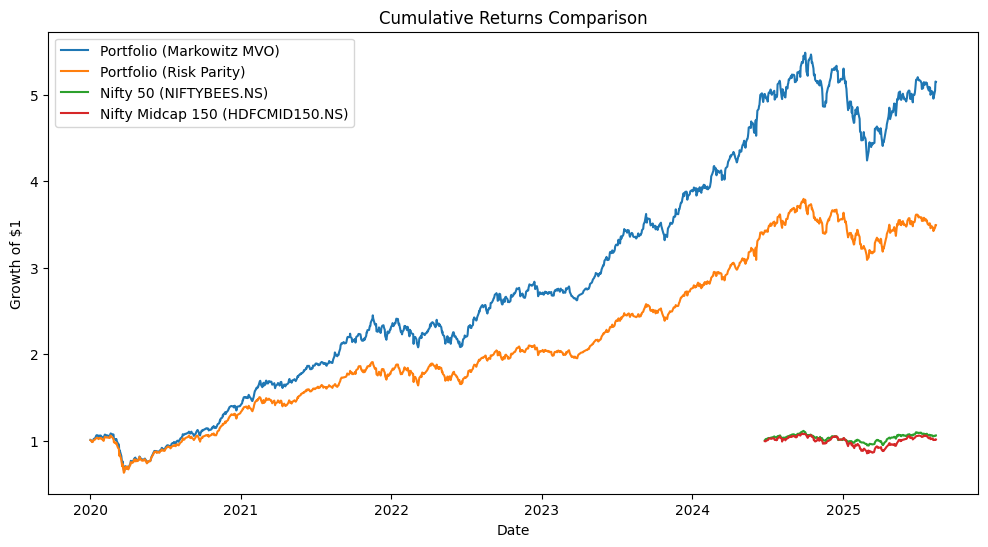

In [87]:
# Download index data for comparison
index_tickers = ['NIFTYBEES.NS', 'HDFCMID150.NS']
index_data = yf.download(index_tickers, start=start_date, end=end_date)['Close'].dropna()

# Calculate daily and cumulative returns for indices
index_returns = index_data.pct_change().dropna()
index_cum_returns = (index_returns + 1).cumprod()

# Plot cumulative returns for portfolio and indices
plt.figure(figsize=(12, 6))
plt.plot(mvo_metrics['cum_returns'], label='Portfolio (Markowitz MVO)')
plt.plot(rp_metrics['cum_returns'], label='Portfolio (Risk Parity)')
plt.plot(index_cum_returns[index_tickers[0]], label='Nifty 50 (NIFTYBEES.NS)')
plt.plot(index_cum_returns[index_tickers[1]], label='Nifty Midcap 150 (HDFCMID150.NS)')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.legend()
plt.show()

## Compare Portfolio with Benchmarks

Download Nifty 50 and Nifty Midcap 150 data, calculate their returns, and compare with portfolio performance using cumulative returns plots.

In [88]:
# Print cumulative returns for portfolio and benchmarks
print(f"Cumulative return (Markowitz Portfolio): {mvo_metrics['cum_returns'].iloc[-1] - 1:.2%}")
print(f"Cumulative return (Risk Parity Portfolio): {rp_metrics['cum_returns'].iloc[-1] - 1:.2%}")
print(f"Cumulative return (Nifty 50): {index_cum_returns[index_tickers[0]].iloc[-1] - 1:.2%}")
print(f"Cumulative return (Nifty Midcap 150): {index_cum_returns[index_tickers[1]].iloc[-1] - 1:.2%}")

Cumulative return (Markowitz Portfolio): 415.00%
Cumulative return (Risk Parity Portfolio): 249.43%
Cumulative return (Nifty 50): 6.33%
Cumulative return (Nifty Midcap 150): 1.68%


## Print Cumulative Returns

Display cumulative returns for both portfolio strategies and benchmarks for easy comparison.